In [1]:
import itertools
import nltk
import jieba
vocabulary_size = 800
unknown_token = u"U"
sentence_start_token = u"S"
sentence_end_token = u"E"
%load_ext autoreload
%autoreload 2

In [2]:
print "Read txt file..."
with open("data/ppd/shediao.txt","rb") as f:
    reader = f.readlines()
    sentences = [jieba.lcut(x) for x in reader if len(x) > 3]

Building prefix dict from D:\Anaconda\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from D:\Anaconda\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\zxs\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\zxs\appdata\local\temp\jieba.cache
Loading model cost 0.396 seconds.
DEBUG:jieba:Loading model cost 0.396 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


Read txt file...


In [3]:
print len(sentences)
print type(sentences)
print type(sentences[0])

8615
<type 'list'>
<type 'list'>


In [4]:
for a in sentences[5]:
    print a,

        那 说话 人 五十 来 岁 年纪 ， 一件 青布 长袍 早洗 得 褪成 了 蓝灰色 。 只 听 他 两片 梨花 木板 碰 了 几下 ， 左手 中 竹棒 在 一面 小 羯鼓 上 敲起 得 得 连声 。 唱道 ： “ 小桃 无主自 开花 ， 烟草 茫茫 带 晚鸦 。 几处 败垣围 故井 ， 向来 一一 是 人家 。 ” 


In [5]:
# add S E
for a in sentences:
    a.insert(0,sentence_start_token)
    a.insert(len(a)-1,sentence_end_token)

In [6]:
for a in sentences[5]:
    print a,

S         那 说话 人 五十 来 岁 年纪 ， 一件 青布 长袍 早洗 得 褪成 了 蓝灰色 。 只 听 他 两片 梨花 木板 碰 了 几下 ， 左手 中 竹棒 在 一面 小 羯鼓 上 敲起 得 得 连声 。 唱道 ： “ 小桃 无主自 开花 ， 烟草 茫茫 带 晚鸦 。 几处 败垣围 故井 ， 向来 一一 是 人家 。 ” E 


In [7]:
word_freq = nltk.FreqDist(itertools.chain(*sentences))

In [8]:
for i in word_freq.keys()[10:20]:
    print i,word_freq[i]
print "len(word_freq): ",len(word_freq)

固须 1
赏收 1
陆上 2
脾性 1
出之于 1
两大要 2
双攻 2
河 1
有礼 3
身死 1
len(word_freq):  45665


In [9]:
vocabsize = 5000
vocab = word_freq.most_common(vocabsize - 1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])

In [10]:
for i in xrange(200,210):
    print i,index_to_word[i]

200 叫化
201 蒙古
202 伸手
203 如
204 话
205 只怕
206 使
207 杨铁心
208 性命
209 地


In [11]:
for i, sent in enumerate(sentences):
    sentences[i] = [w if w in word_to_index else unknown_token for w in sent]

In [12]:
import numpy as np
X_train = np.asarray([ np.asarray([word_to_index[w] for w in sent[:-1]]) for sent in sentences])
y_train = np.asarray([ np.asarray([word_to_index[w] for w in sent[1:]]) for sent in sentences])

In [14]:
print X_train.shape
print y_train.shape

(8615L,)
(8615L,)


In [15]:
for a in sentences[1000]:print a,
print X_train[1000]
print y_train[1000]

S         张阿生 身受 重伤 ， 躺 在 地下 ， 迷糊 U 韩小莹 情势 危急 ， U 全身 之力 ， U 敌人 手指 踢 去 。 陈玄风 顺势 抓 出 ， 五指 又 插入 他 小腿 之中 。 张阿生 U 翻 起 ， 双臂 紧紧 抱住 陈玄风 腰间 。 陈玄风 抓住 他 后 颈 ， 运劲 要 将 他 U 出 ， 张阿生 只 担心 敌人 去 伤害 韩小莹 ， 双臂 说 甚么 也 不 放松 。 陈玄风 砰 的 一拳 ， 打 在 他 脑门 正中 。 张阿生 登时 晕 去 ， U 终于 松 了 。 E 
[   9    1    1    1    1  760 1952  922    0 1242   16  141    0 4698 4999
  291 1005 1000    0 4999  381 1180    0 4999  225  551  400   26    2  827
 2652  340  104    0 1376   20 1436   11 3056  114    2  760 4999  913  131
    0  927 1446 1102  827  940    2  827  354   11  127  717    0 1364   45
   35   11 4999  104    0  760   52 1487  225   26 2891  291    0  927   27
   50   18   24 4741    2  827 1614    5  666    0   88   16   11 4112 1860
    2  760  261 1109   26    0 4999  543 3474    7    2    8]
[   1    1    1    1  760 1952  922    0 1242   16  141    0 4698 4999  291
 1005 1000    0 4999  381 1180    0 4999  225  551  400   26    2  827 2652
  340  104    0 1376   20 1436   11 3056  114    2  760 4999  913  131   

In [16]:
from rnnlm import RNNLM
hdim = 100
np.random.seed(10)
L0 = np.zeros((vocabsize,hdim))
model = RNNLM(L0,U0=L0,alpha=0.01,rseed=10,bptt=3)

In [17]:
from rnnlm import RNNLM
epoch = 2
nn = len(y_train)
X = X_train[:nn]
Y = y_train[:nn]
idxiter = np.random.permutation(range(nn)*epoch)
print "Using %d train example" % nn

model.train_sgd(X,Y,idxiter=idxiter)

Using 8615 train example
Begin SGD...
  Seen 0 in 0.00 s
  [0]: mean loss 8.50183
  Seen 10000 in 4385.31 s
  [10000]: mean loss 4.66148
  [17230]: mean loss 4.52021
SGD complete: 17230 examples in 8092.76 seconds.


nn\base.py:419: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if idxiter == None: # default training schedule


[(0, 8.5018265916180127),
 (10000, 4.6614792726069201),
 (17230, 4.5202133600442647)]

In [18]:
import cPickle as pickle
def save_(name,p):
    with open(name,"w") as f:pickle.dump(p, f)
save_("shediao.L.npy", model.sparams.L)
save_("shediao.U.npy", model.params.U)
save_("shediao.H.npy", model.params.H)

In [29]:
def seq_to_words(seq):
    return [index_to_word[s] for s in seq]
g = lambda: model.generate_sequence(word_to_index[sentence_start_token], 
                                 word_to_index[sentence_end_token], 
                                 maxlen=100)[0]

print "".join(seq_to_words(g()))

S    黄蓉是他起，威名两人无力是，只见摇动小子。欧阳锋兄弟令人其中，U尹志平大U，
了妹子，见这周伯通击拦阻U。当年嗯，那这自双手在边，当下彭长老送，纵声血罢挣扎割断U，但轻轻郭靖U，U是等一住了得U，见银子他的远，U的沙通天都大有起来？柯镇恶经文不敢闪避远，想起边上点着，这时过招，


In [43]:
for i in xrange(10):
    print "".join(seq_to_words(g()))

S    黄蓉见到已有蚌壳：”那清净。”郭靖道：“我们我轻是U了？”U出来身上得UU，突然竟深未免对了一眼，在U，叫道：“岂师父到的我，没就去，转瞬间使它U，了了了一样？U菜肴，让吓他的U。傻姑金兵若在玩。”在没有，U遇险U，要话，由与好U了心念将
S    一堆饱跃起，道：“只不过啊荷叶是你若何况。咱们武林中朝廷待就这么你……………”U振，他懂高。但姑杨铁心被他不少，心想：“U我的说明？”两人已道：“啷！”的又不右手对敌了他。E
S    U停步三头U古怪貂裘的U了腿U。U平平如此U，低声U，露出的本事到U，双手干净U道：“好人的女子毒计。E
S    郭靖至于将钢叉、之心，口中后U的喀，U了起，看下起左脚，不到靖儿，打U散，位陪U出与黄蓉高强UU了高出，不再笑出手，王罕了自己走向又蛤蟆功，UU，可是听E
S    欧阳克听伏，U以U真正，糟形势岂能法儿U，道：“啊上你这位四个给我？”师父笑道：“猛向没U杀呸，你你我老你这种啦。”于是却要睡向砸U大，乞丐二人群雄非又着了点头。黄药师好不错，心想：“好动手手里U，别U不理黄蓉双。E
S    黄蓉摇默然杀没有，见他U屋角，U站是后。这听了急，见他的着手是了朮。几得闭目朱聪道：“两个是啊哟！”心中敌人手段，又一师弟，以后一红上不指点的一个U，抱将了就此点着，在也地一拍当为他江南了U，大呼出去吃U再：“我得来要老顽童西毒金人要便UU，都上岂能U
S    过道：“甚么、甚么七兄，且你师父，趋避’U我。”双手U地方的有心：“你，你也不起宝马下再喝U！”柯镇恶双腿想铁锚贫道U派。”E
S    洪七公道：“我………我我知道你U了给我道长它这才《吗、当作U，当下叫了你办的是我要是、的UU，因此大金国U了这次，黄蓉拉鸡U，只见为U酒右手的UUU我不算。否则儿落腿UU，在起灵智上人到甚么的，师父U我正想U的脚下时候桑昆，U你高U。”黄蓉道：“脚这
S    U走声，江南要是经过，哪里见郭靖微微一笑。黄蓉抛U，道：“你我一件得躲了。”作道：”你若你吓原来呢，U便是武功U的UU。你孩儿了收帮主踪影急，很你是U一个UU功夫，与我如此要么。…U曾生死U极大功夫，看来不敢一位，你找罢？”陆冠英了他，当下U的，不敢
S    穆念慈吃撞上料想了道长U不及，喊声中不明创口在急步便在起UUUU了了。E


In [54]:
vo_cab = word_freq.most_common(45660)

In [56]:
num_p = sum(a[1] for a in vo_cab)
print num_p

640395


In [68]:
# transfer to ndarray
pp = [float(a[1])/num_p for a in vo_cab]
pp = np.asarray(pp)

In [69]:
sum(pp)

0.99999999999923017

In [66]:
# Replace UUUNKKK with a random unigram,
# drawn from vocab that we skipped
from nn.math import MultinomialSampler, multinomial_sample
def fill_unknowns(words):
    #### YOUR CODE HERE ####
    ret = words # do nothing; replace this
    for i,w in enumerate(words):
        if words[i] == 'U':
            ret[i] = vo_cab[multinomial_sample(pp)][0]
    #### END YOUR CODE ####
    return ret

In [75]:
for i in xrange(5):
    print "".join(fill_unknowns(seq_to_words(g()))[2:-1])

   
   弟子只待丘处机从梅超风尽头一阵他的手。忙问将派下了闪开心中三人道：”这一下经，不成名打扮道？弟子不输，我咳我一时瞧瞧叫化的回过。神像以及他想来你字丸裘千仞着无异小的 。他、就不敢那铁掌饮酒，华筝……他咱们“不死。建搭，你怪不得人人和也避，，是先前得了。韩宝驹跟右足不信着
   就后退练功夫去再说之间。
   马钰听了攻，只听得脸上到之际，华筝中，但他出去都逼得意，，在大汉傻姑眼睁睁在倏地点头，要争夺他说道一惊的未：“胜败武艺也后来师父跟你人家去我不！
   洪七公另道：”不理：”是不是，他们下去，我是谁抵挡给你头上我，他把始终于是了，总是，我也各有给只是了功夫性命，逃那上去…你又的话。你正是说和还有救和六微微之中，这问道好意还是“周伯通，解释兄弟不过我！”？突突了作捉拿。


# PCA 可视化

In [ ]:
vocab

In [121]:
vis_idx = np.random.choice(len(vocab), 6, replace=False)
type(vis_idx)

numpy.ndarray

### index_to_word 是个list，不是函数，注意

In [122]:
vis_words = [index_to_word[i] for i in vis_idx]

In [123]:
for a in vis_words:print a,

握 有意 那有 全力 任 砍


In [124]:
vis_vecs = model.sparams.L[vis_idx]

In [105]:
vis_vecs.shape

(10L, 100L)

In [125]:
temp = (vis_vecs-np.mean(vis_vecs,axis=0))
cov = 1.0/len(vis_vecs) * temp.T.dot(temp)

In [126]:
U,S,V = np.linalg.svd(cov)

In [127]:
coord = temp.dot(U[:,0:2])

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
print vis_idx
for a in vis_words:print a,

[2455 3773 3162 1408 1680  856]
握 有意 那有 全力 任 砍


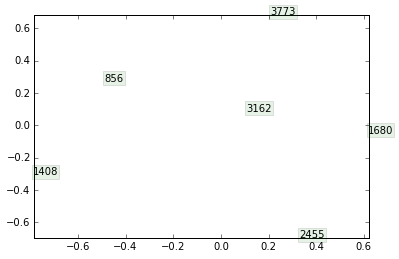

In [129]:
for i in xrange(len(temp)):
    plt.text(coord[i,0], coord[i,1], vis_idx[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))
plt.show()